# Causes for Flight Delays in the US from 2010-2020
## by Jordan Mazza

## Investigation Overview
In this presentation, I analyze some of the leading causes if flight delays in the US from the years 2010-2020. Some of these analyses include, but are not limited to, analyzing flight delay patterns over time, within certain airlines, and at certain locations. I also look at the relationships flight delays causes to see if any of them are correlated with one another or are influenced by variables such as time of year or location.

## Dataset Overview
After some minor data wrangling steps, my dataset has 171,396 rows and 19 columns. This dataset covers flight delay statistics from January 2003 to September 2020 and includes information on 5 types of flight delays, locations, airline, and well as time of year (in months and years). The five types of flight delays in this dataset consists of the following: 
- `weather`: Delays due to unsafe weather conditions
- `security`: Delays due to security (such as evacuation of a terminal or airplane re-boarding because of security breach).
- `late aircraft`: Delays due to an airplane arriving late
- `nas`: Delays due to issues with the National Aviation Services (NAS) such as taxing, passenger loading, and airport technologies
- `carrier`: Delays due to issues with the airplane itself

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/Users/jordanmazza/Desktop/Udacity Files/Project 5/Final Submission/airline_delay_causes.csv')
df.columns = df.columns.str.strip()
df = df.query('year >= 2010').sort_values(['year', 'month'])
df = df.rename(columns={"arr_flights": "flights_total", 
                   "arr_del15": "flights_delayed_total",
                   "arr_cancelled": "flights_cancelled",
                   "arr_diverted": "flights_diverted"})
df = df.drop(columns = ['carrier', 'airport_name', 'Unnamed: 21'])

## Flight Delay Changes Over Time 
This set of line plots show total flight delays over time, both in total amount, as well as proportionately. Unsurprisingly, the year 2020 has a significant drop in flight delays in both overall numbers, and proportionately. Because travel has ceased for many Americans this year, they are less flights in general; therefore, there are less flight delays.

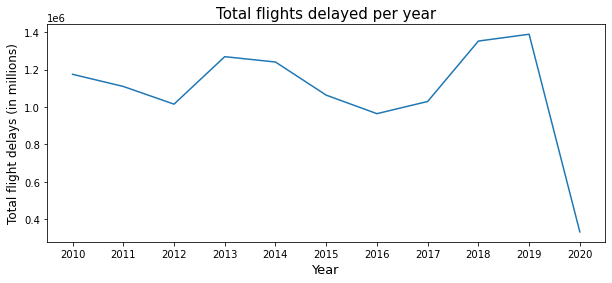

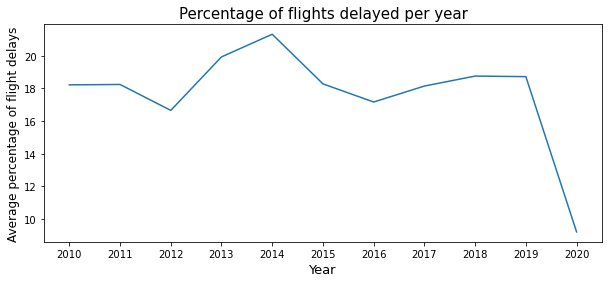

In [4]:
# Total flight delays per year
delay_timeline = df.groupby('year', as_index=False)[['flights_delayed_total', 'flights_total']].sum()

delay_timeline.plot(kind='line', x='year', y='flights_delayed_total', figsize=(10,4), legend=False)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total flight delays (in millions)', fontsize=12)
plt.xticks(ticks = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.title('Total flights delayed per year', fontsize=15);

# Percentage of flights delayed per year
delay_timeline['delays_perct'] = 100 * delay_timeline['flights_delayed_total'] / delay_timeline['flights_total']
delays = delay_timeline.groupby('year', as_index=False)['delays_perct'].mean()

delays.plot(kind='line', x='year', y='delays_perct', figsize = (10,4), legend=False)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average percentage of flight delays', fontsize=12)
plt.xticks(ticks = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.title('Percentage of flights delayed per year', fontsize=15);

## Categorical Breakdown of Flight Delay Causes
This waffle plot shows the breakdown of delay causes out of all delayed flights. This waffleplot is a 10 x 10 plot, where one plane represents one percentage point. This shows the most common delay cause is late aircrafts, while the smallest by far is security delays.

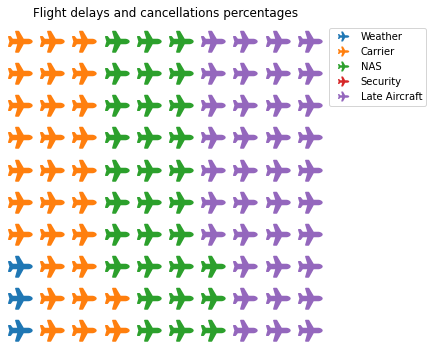

In [27]:
#Set up for Following Waffle Plot
delayed_total = df.flights_delayed_total.sum()
delayed_total

weather_ct = round(100 * df.weather_ct.sum() / delayed_total)
carrier_ct = round(100 * df.carrier_ct.sum() / delayed_total)
nas_ct = round(100 * df.nas_ct.sum() / delayed_total)
security_ct = round(100 * df.security_ct.sum() / delayed_total)
late_aircraft_ct = round(100 * df.late_aircraft_ct.sum() / delayed_total)
# print(weather_ct,
#       carrier_ct,
#       nas_ct,
#       security_ct,
#       late_aircraft_ct)

# percentages of causes for delay
colors = sb.color_palette()[0:5]
data = {'Weather': 3, 'Carrier': 29, 'NAS':31, 'Security': 0, 'Late Aircraft': 37}
fig = plt.figure(FigureClass=Waffle,rows=10, values=data, 
                 colors = colors,
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
                 icons='plane', icon_size=22, icon_legend=True, figsize=[6,6])
plt.title('Flight delays and cancellations percentages');

## Relationship of the 5 Flight Delay Causes
The heatmap below shows the correlations between pairs of the flight delays causes. The positive correlations displayed in these scatterplots make senss because delays in one location in the country are bound to effect delays in other locations. So, if one place is experiencing a weather delay, its destination location might then experience a late aircraft delay in response to the weather delays. When a certain delay type increases, it makes sense there would be an increase in another delay type.

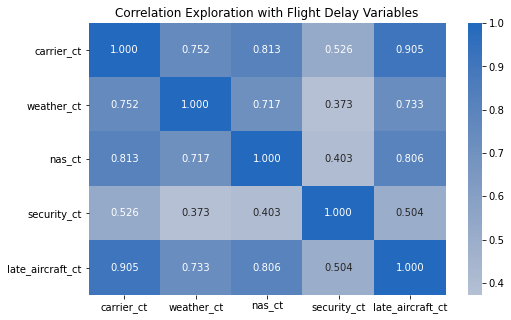

In [7]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].corr(),
           annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Exploration with Flight Delay Variables');

## Weather Delays in Cold Climates Throughout the Year
This clustered bar plot shows the relationship between location, time of year, and amount of weather delays. Regardless of month, the airports located in some of the coldest climates in the country tend to have a consistent amount of weather delayed flights throughout the whole year. Based on this plot, we cannot conclude there is any interaction between location, time of year influencing and amount of weather delays.

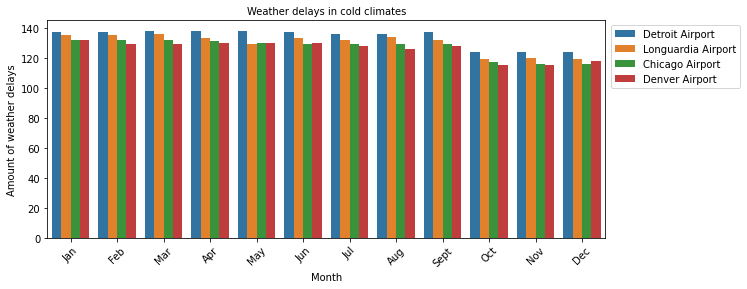

In [8]:
#cold weather airports
cold_airports = df.query('airport == "ORD" | airport == "LGA" | airport == "DEN" | airport == "DTW"')

plt.figure(figsize = [10,4])
sb.countplot(data=cold_airports, x='month', hue='airport')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
           rotation = 45, fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Amount of weather delays', fontsize=10)
plt.title('Weather delays in cold climates', fontsize=10)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1), ncol=1,
           labels = ['Detroit Airport', 'Longuardia Airport', 'Chicago Airport', 'Denver Airport'], fontsize=10);

## Relationship Between Delay Causes
This final plot shows the four-way relationship of carrier, weather, nas, and late aircraft delays.  While this plot does not show an incredibly strong interaction between the four variables, it is interesting to note when there are unusually high amounts of one delay, the odds of there being high amounts of the other delays also increased. In other words, it seems all four variables share outliers, meaning when one variable has a particularly large amount of delays, so do the other three. This is best portrayed through the point in the upper right-hand corner of the graph.

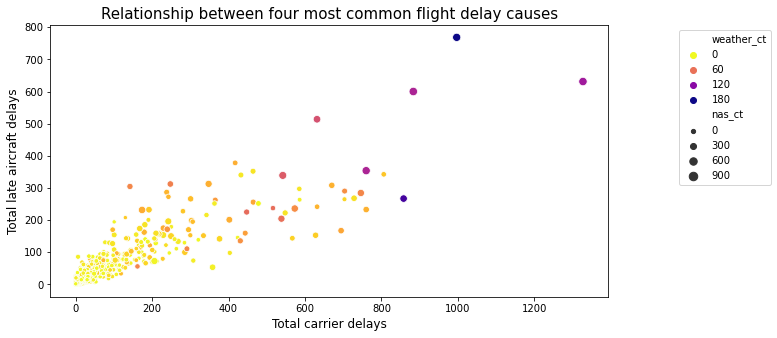

In [7]:
samples = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.reindex(samples) 
df_samp.dropna(inplace=True)

plt.figure(figsize = [10 , 5])
sb.scatterplot(data=df_samp, x='late_aircraft_ct', y='carrier_ct',
               size='nas_ct', hue='weather_ct', palette = 'plasma_r')
plt.xlabel('Total carrier delays', fontsize=12)
plt.ylabel('Total late aircraft delays',fontsize=12)
plt.title('Relationship between four most common flight delay causes', fontsize=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.3,1));

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`